In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#  Path to your dataset
file_path = "C:/Dataset/1.csv" 

# Load dataset
if os.path.exists(file_path):
    data = pd.read_csv(file_path)
    print(" Dataset loaded successfully!")
else:
    print(" File not found. Check the path:", file_path)

# Display dataset info
print("\n Dataset Info:")
print(data.info())

# Display missing values
print("\n Missing Values:")
print(data.isnull().sum().sort_values(ascending=False))


 Dataset loaded successfully!

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13812 entries, 0 to 13811
Data columns (total 79 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Patient_ID                            13812 non-null  int64  
 1   Age                                   13812 non-null  int64  
 2   Gender                                13812 non-null  object 
 3   Diagnosis                             13812 non-null  object 
 4   Sickness_Duration_Months              13812 non-null  int64  
 5   RBC_Count                             13812 non-null  float64
 6   Hemoglobin                            13812 non-null  float64
 7   Hematocrit                            13812 non-null  float64
 8   MCV                                   13812 non-null  float64
 9   MCH                                   13812 non-null  float64
 10  MCHC                                

In [2]:
# Statistical summary of numeric columns
data.describe()

# Explore unique values in categorical columns like Gender and Diagnosis
data['Gender'].value_counts()
data['Diagnosis'].value_counts()

Diagnosis
Autoimmune orchitis                   2490
Systemic lupus erythematosus (SLE)    2390
Rheumatoid arthritis                  2310
Normal                                2230
Sjögren syndrome                      2200
Graves' disease                       2192
Name: count, dtype: int64

In [3]:
from sklearn.preprocessing import LabelEncoder

# Encoding Gender and Diagnosis columns
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
data['Diagnosis'] = LabelEncoder().fit_transform(data['Diagnosis'])

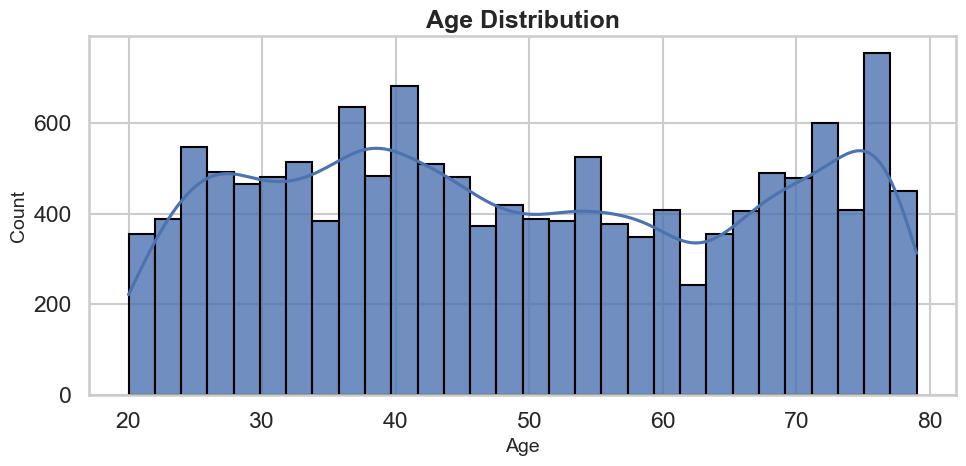

C:\Users\sudha\AppData\Local\Temp\ipykernel_9984\3475648117.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


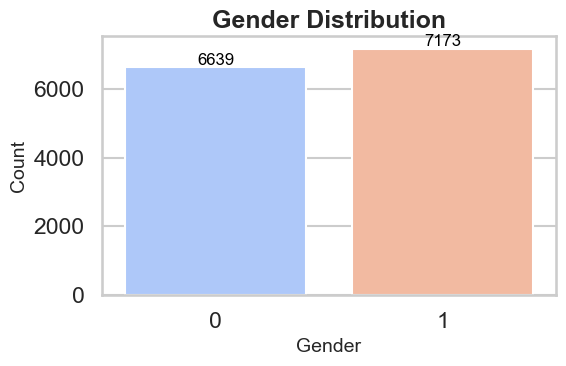

C:\Users\sudha\AppData\Local\Temp\ipykernel_9984\3475648117.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


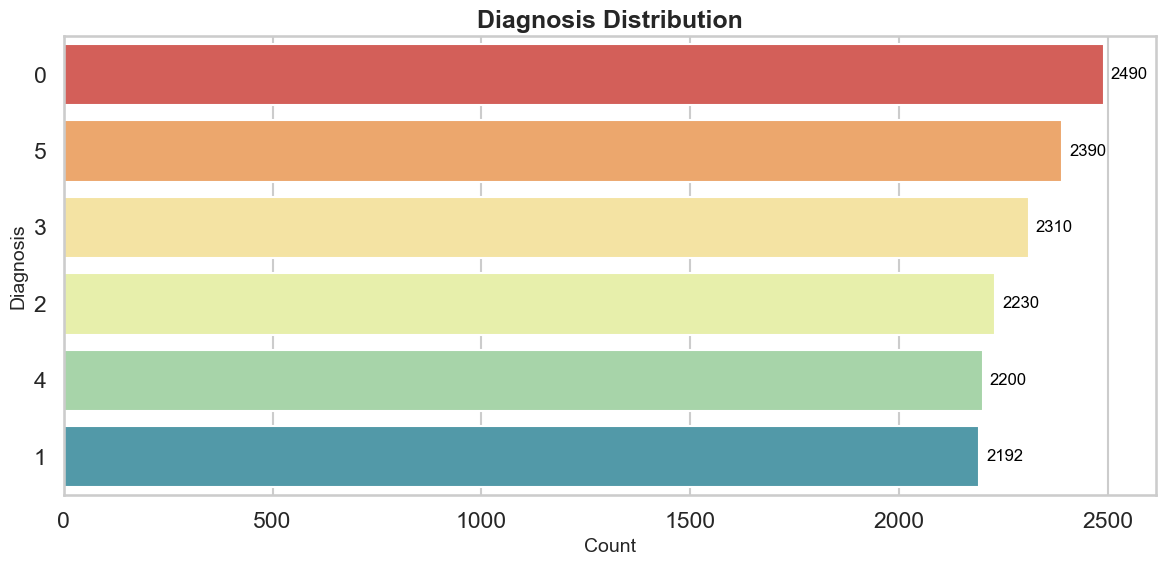

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set global Seaborn style
sns.set_theme(style="whitegrid", context="talk", palette="Set2")

# --- Age Distribution ---
plt.figure(figsize=(10, 5))
sns.histplot(
    data=data, 
    x='Age', 
    kde=True, 
    color='#4C72B0', 
    bins=30, 
    edgecolor='black', 
    alpha=0.8
)
plt.title('Age Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

# --- Gender Distribution ---
plt.figure(figsize=(6, 4))
sns.countplot(
    data=data, 
    x='Gender', 
    palette='coolwarm', 
    saturation=0.9
)
plt.title('Gender Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add value labels on bars
for p in plt.gca().patches:
    plt.gca().annotate(
        f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', 
        fontsize=12, color='black', 
        xytext=(0, 5), textcoords='offset points'
    )
plt.tight_layout()
plt.show()

# --- Diagnosis Distribution ---
plt.figure(figsize=(12, 6))
sns.countplot(
    data=data, 
    y='Diagnosis', 
    order=data['Diagnosis'].value_counts().index, 
    palette='Spectral', 
    saturation=0.8
)
plt.title('Diagnosis Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Diagnosis', fontsize=14)

# Add value labels
for p in plt.gca().patches:
    plt.gca().annotate(
        f'{int(p.get_width())}', 
        (p.get_width(), p.get_y() + p.get_height() / 2.),
        ha='left', va='center', 
        fontsize=12, color='black', 
        xytext=(5, 0), textcoords='offset points'
    )
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Correlation Matrix of Clinical Features')

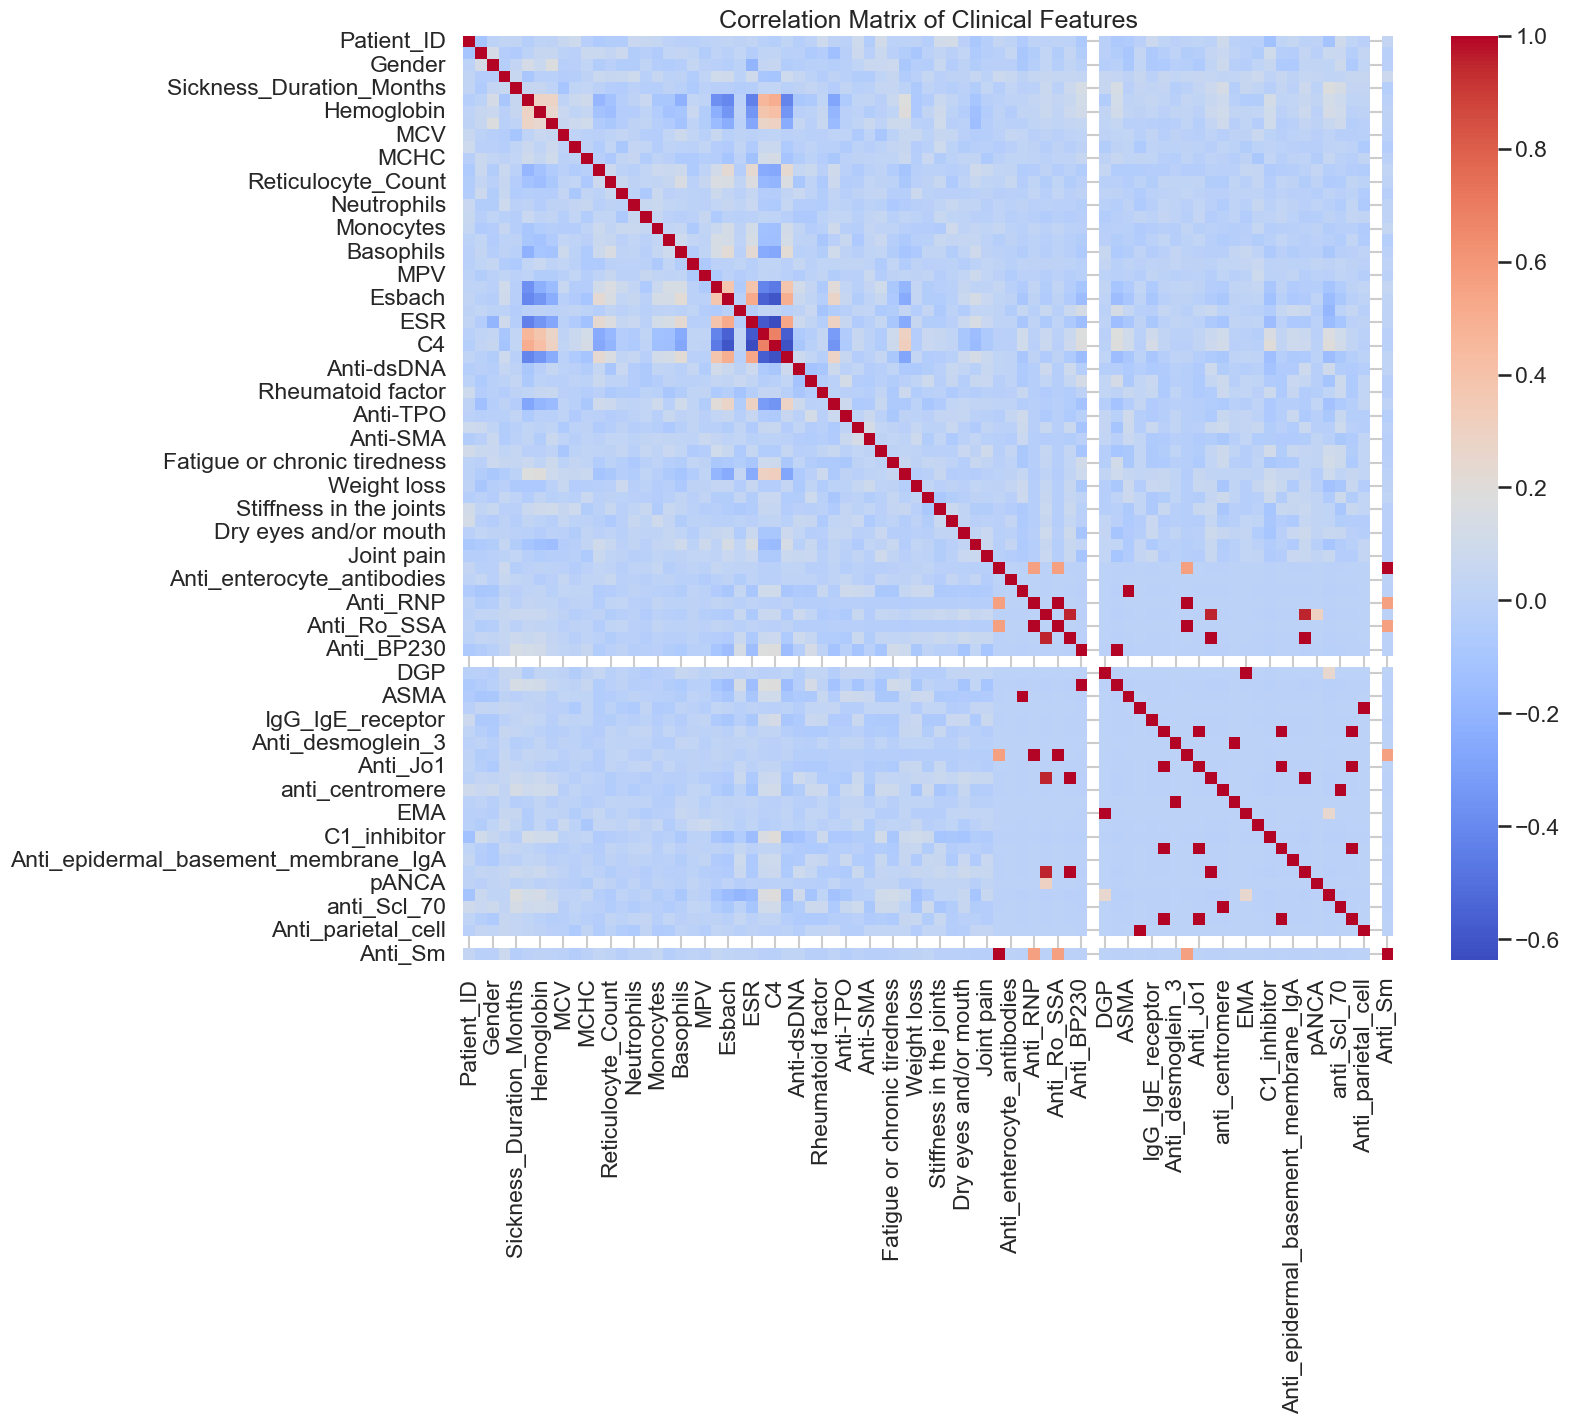

In [5]:
# Heatmap of correlations
plt.figure(figsize=(15, 12))
sns.heatmap(data.corr(), cmap="coolwarm", annot=False)
plt.title('Correlation Matrix of Clinical Features')

Text(0.5, 1.0, 'RBC Count vs Hemoglobin by Diagnosis')

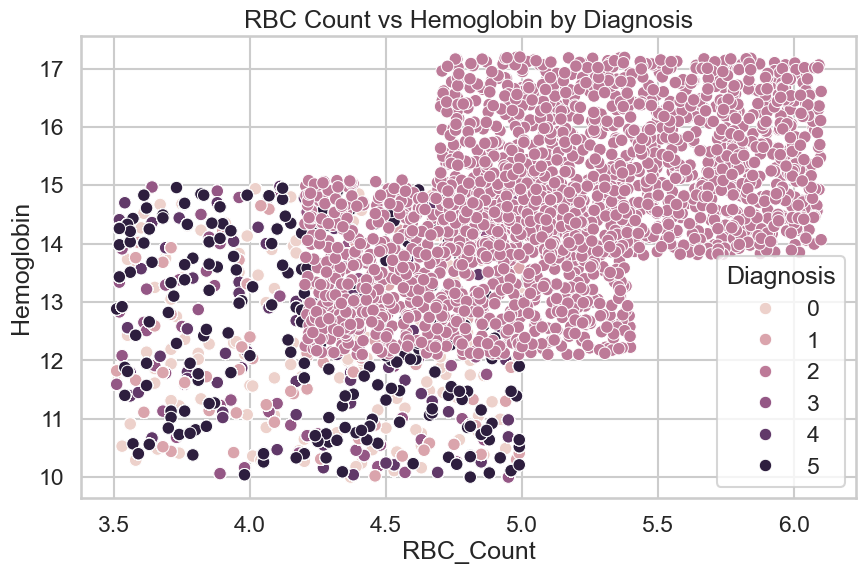

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RBC_Count', y='Hemoglobin', hue='Diagnosis', data=data)
plt.title('RBC Count vs Hemoglobin by Diagnosis')

In [7]:
from sklearn.preprocessing import MultiLabelBinarizer

# Convert Diagnosis column to list of lists format, where each label is a list (even if single)
data['Diagnosis'] = data['Diagnosis'].apply(lambda x: [x])

# Use MultiLabelBinarizer for one-hot encoding
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(data['Diagnosis'])
disease_classes = mlb.classes_

# Verify the result
print(y.shape)  # Should have shape (num_samples, num_classes)

(13812, 6)


In [8]:
import sys
print(sys.executable)


C:\Users\sudha\anaconda3\python.exe


In [9]:
import torch
from transformers import BertTokenizer, BertModel, BertForSequenceClassification
from torch.utils.data import Dataset, DataLoader
# Import AdamW from torch.optim instead of transformers
from torch.optim import AdamW  # Changed import location
import torch.nn as nn

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import numpy as np

# Split the features and labels
features = data.drop(columns=['Diagnosis'])  # Drop target column
labels = y  # Multi-label target from previous step

# Standardize features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)

In [11]:
class AutoimmuneDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return {
            'features': torch.tensor(self.features[idx], dtype=torch.float),
            'labels': torch.tensor(self.labels[idx], dtype=torch.float)
        }

# Create DataLoader objects
train_dataset = AutoimmuneDataset(X_train, y_train)
val_dataset = AutoimmuneDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)

In [12]:
class MultiLabelNN(nn.Module):
    def __init__(self, input_dim, n_classes):
        super(MultiLabelNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.out = nn.Linear(64, n_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return torch.softmax(self.out(x), dim=1)  # Using softmax here

# Initialize the model
model = MultiLabelNN(input_dim=X_train.shape[1], n_classes=labels.shape[1])

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.00001)

In [14]:
def train_epoch(model, data_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0

    for batch in data_loader:
        features = batch['features'].to(device)
        labels = batch['labels'].to(device)

        # Forward pass
        outputs = model(features)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Return the average loss per batch
    avg_loss = total_loss / len(data_loader)
    return avg_loss

In [15]:
from sklearn.metrics import f1_score, accuracy_score
import numpy as np

def evaluate_epoch(model, data_loader, criterion, device, threshold=0.5):
    model.eval()
    total_loss = 0
    all_labels = []
    all_preds = []

    with torch.no_grad():
        for batch in data_loader:
            features = batch['features'].to(device)
            labels = batch['labels'].to(device)

            # Forward pass
            outputs = model(features)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            # Apply threshold to get binary predictions
            preds = (outputs > threshold).int().cpu().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy())

    # Calculate average loss
    avg_loss = total_loss / len(data_loader)

    # Flatten lists to arrays for metric calculation
    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)

    # Compute additional metrics
    f1_micro = f1_score(all_labels, all_preds, average='micro')
    f1_macro = f1_score(all_labels, all_preds, average='macro')
    accuracy = accuracy_score(all_labels, all_preds)

    # Return metrics and the collected labels and predictions
    return {
        "val_loss": avg_loss,
        "f1_micro": f1_micro,
        "f1_macro": f1_macro,
        "accuracy": accuracy,
        "all_labels": all_labels,
        "all_preds": all_preds
    }

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

num_epochs = 200  # Adjust as necessary

# Initialize lists to store metrics
train_losses = []
val_losses = []
val_f1_scores = []
val_accuracies = []
all_labels = []
all_preds = []

for epoch in range(num_epochs):
    train_loss = train_epoch(model, train_loader, criterion, optimizer, device)
    val_metrics = evaluate_epoch(model, val_loader, criterion, device)

    # Append metrics to lists
    train_losses.append(train_loss)
    val_losses.append(val_metrics["val_loss"])
    val_f1_scores.append(val_metrics["f1_micro"])
    val_accuracies.append(val_metrics["accuracy"])

    # Store the all_labels and all_preds for confusion matrix after training
    all_labels = val_metrics["all_labels"]
    all_preds = val_metrics["all_preds"]

    # Print metrics for each epoch
    print(f"Epoch {epoch + 1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}")
    print(f"Val Loss: {val_metrics['val_loss']:.4f}, Val F1 Score: {val_metrics['f1_micro']:.4f}, Accuracy: {val_metrics['accuracy']:.4f}")

Epoch 1/200
Train Loss: 0.4485
Val Loss: 0.4453, Val F1 Score: 0.0000, Accuracy: 0.0000
Epoch 2/200
Train Loss: 0.4400
Val Loss: 0.4345, Val F1 Score: 0.0000, Accuracy: 0.0000
Epoch 3/200
Train Loss: 0.4257
Val Loss: 0.4172, Val F1 Score: 0.0597, Accuracy: 0.0308
Epoch 4/200
Train Loss: 0.4064
Val Loss: 0.3984, Val F1 Score: 0.2634, Accuracy: 0.1516
Epoch 5/200
Train Loss: 0.3890
Val Loss: 0.3838, Val F1 Score: 0.2742, Accuracy: 0.1589
Epoch 6/200
Train Loss: 0.3764
Val Loss: 0.3736, Val F1 Score: 0.2785, Accuracy: 0.1618
Epoch 7/200
Train Loss: 0.3677
Val Loss: 0.3660, Val F1 Score: 0.2817, Accuracy: 0.1640
Epoch 8/200
Train Loss: 0.3610
Val Loss: 0.3601, Val F1 Score: 0.2913, Accuracy: 0.1705
Epoch 9/200
Train Loss: 0.3556
Val Loss: 0.3550, Val F1 Score: 0.2971, Accuracy: 0.1744
Epoch 10/200
Train Loss: 0.3510
Val Loss: 0.3506, Val F1 Score: 0.3002, Accuracy: 0.1766
Epoch 11/200
Train Loss: 0.3467
Val Loss: 0.3465, Val F1 Score: 0.3023, Accuracy: 0.1781
Epoch 12/200
Train Loss: 0.342

In [17]:
import numpy as np
import torch

def get_predictions(model, data_loader, device, threshold=0.5):
    model.eval()
    all_preds = []

    with torch.no_grad():
        for batch in data_loader:
            features = batch['features'].to(device)

            # Forward pass to get model outputs
            outputs = model(features)

            # Apply threshold to get binary predictions
            preds = (outputs > threshold).int().cpu().numpy()
            all_preds.extend(preds)

    # Convert predictions to a numpy array
    all_preds = np.array(all_preds)
    return all_preds

In [18]:
# Define the mapping from label index to disease name
label_mapping = {
    0: "Autoimmune orchitis",
    1: "Graves' disease",
    2: "Sjögren syndrome",
    3: "Rheumatoid arthritis",
    4: "Normal",
    5: "Systemic lupus erythematosus (SLE)"
}

In [19]:
# Use get_predictions function to get binary predictions
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
predictions = get_predictions(model, train_loader, device)  # or val_loader

# Convert predictions to disease names using label_mapping
predicted_labels = []
for sample in predictions:
    diseases = [label_mapping[idx] for idx, label in enumerate(sample) if label == 1]
    predicted_labels.append(diseases if diseases else ["No labels predicted"])

# Display the results
for i, labels in enumerate(predicted_labels):
    print(f"Sample {i+1}: {', '.join(labels)}")

Sample 1: No labels predicted
Sample 2: Rheumatoid arthritis
Sample 3: Autoimmune orchitis
Sample 4: Normal
Sample 5: Normal
Sample 6: Rheumatoid arthritis
Sample 7: Systemic lupus erythematosus (SLE)
Sample 8: Rheumatoid arthritis
Sample 9: Autoimmune orchitis
Sample 10: Normal
Sample 11: Systemic lupus erythematosus (SLE)
Sample 12: Autoimmune orchitis
Sample 13: Sjögren syndrome
Sample 14: Normal
Sample 15: Rheumatoid arthritis
Sample 16: Autoimmune orchitis
Sample 17: Rheumatoid arthritis
Sample 18: Systemic lupus erythematosus (SLE)
Sample 19: Rheumatoid arthritis
Sample 20: Normal
Sample 21: Graves' disease
Sample 22: Systemic lupus erythematosus (SLE)
Sample 23: Rheumatoid arthritis
Sample 24: Systemic lupus erythematosus (SLE)
Sample 25: Graves' disease
Sample 26: Normal
Sample 27: Rheumatoid arthritis
Sample 28: Rheumatoid arthritis
Sample 29: Autoimmune orchitis
Sample 30: Graves' disease
Sample 31: Normal
Sample 32: Rheumatoid arthritis
Sample 33: Graves' disease
Sample 34: 

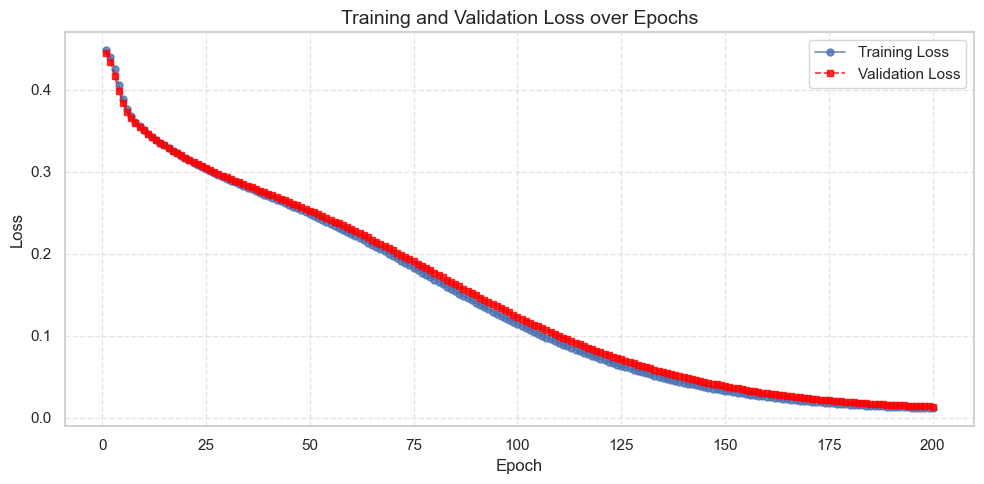

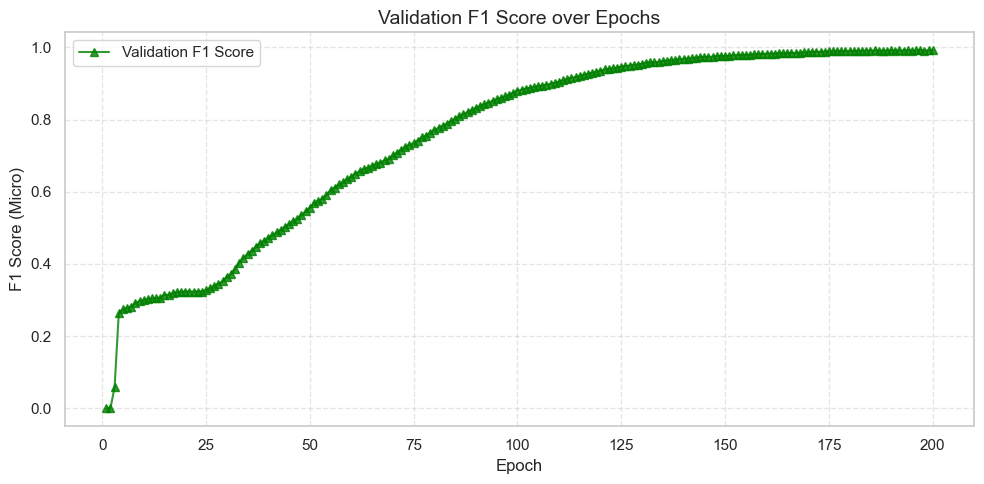

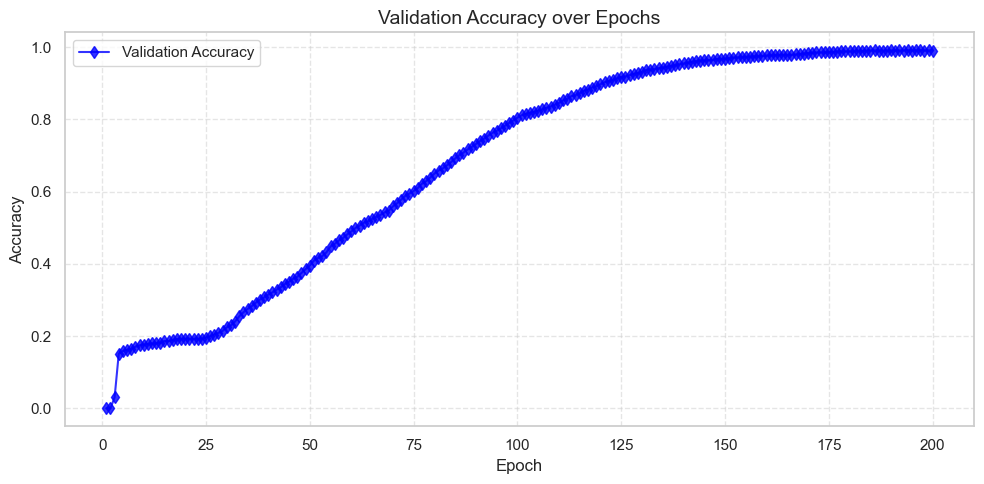

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Apply seaborn style
sns.set(style="whitegrid")

# Define the range of epochs
epochs = range(1, num_epochs + 1)

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, label='Training Loss', marker='o', linestyle='-', linewidth=1.2, markersize=5, alpha=0.8)
plt.plot(epochs, val_losses, label='Validation Loss', marker='s', linestyle='--', color='red', linewidth=1.2, markersize=5, alpha=0.8)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training and Validation Loss over Epochs', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Plot Validation F1 Score
plt.figure(figsize=(10, 5))
plt.plot(epochs, val_f1_scores, label='Validation F1 Score', marker='^', linestyle='-', color='green', linewidth=1.5, markersize=6, alpha=0.8)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('F1 Score (Micro)', fontsize=12)
plt.title('Validation F1 Score over Epochs', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Plot Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, val_accuracies, label='Validation Accuracy', marker='d', linestyle='-', color='blue', linewidth=1.5, markersize=6, alpha=0.8)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Validation Accuracy over Epochs', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


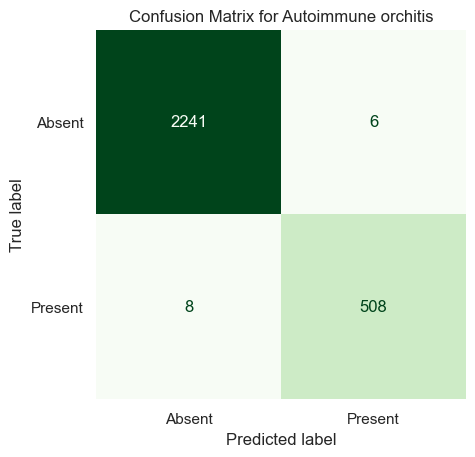

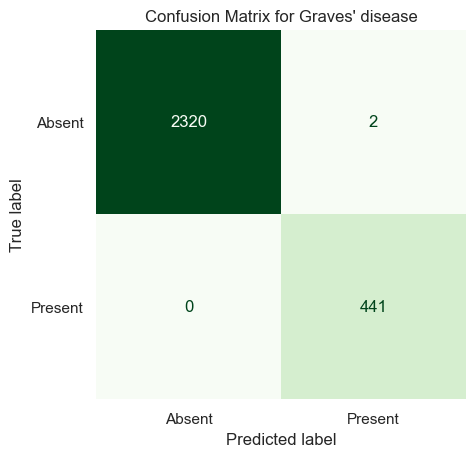

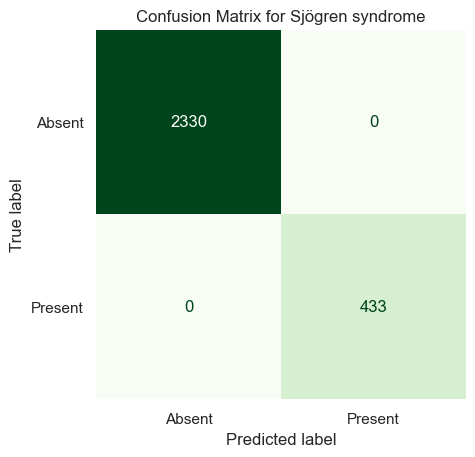

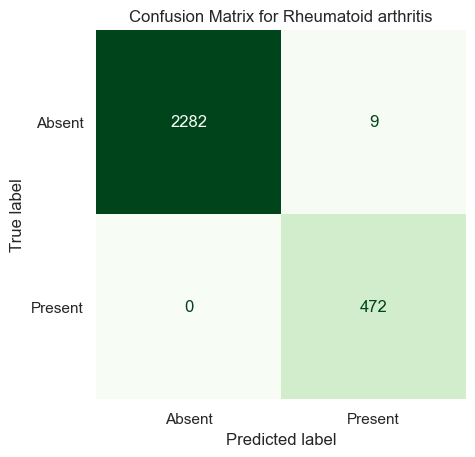

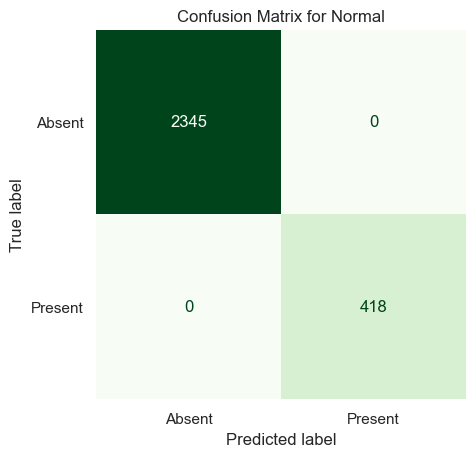

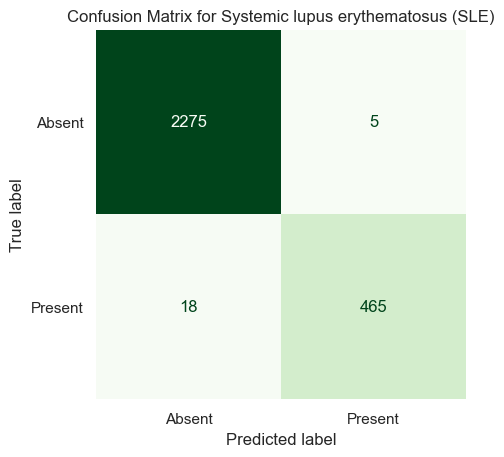

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay

# Calculate confusion matrices for each label
conf_matrices = multilabel_confusion_matrix(all_labels, all_preds)

# Label mapping for each class
label_mapping = {
    0: "Autoimmune orchitis",
    1: "Graves' disease",
    2: "Sjögren syndrome",
    3: "Rheumatoid arthritis",
    4: "Normal",
    5: "Systemic lupus erythematosus (SLE)"
}

# Plot each confusion matrix with green color and no grid/lines
for i, (cm, label) in enumerate(zip(conf_matrices, label_mapping.values())):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Absent", "Present"])
    disp.plot(cmap="Greens", colorbar=False)  # Green colormap, no colorbar
    plt.title(f'Confusion Matrix for {label}')
    plt.grid(False)           # Remove grid
    plt.gca().spines[:].set_visible(False)  # Remove axes lines
    plt.show()



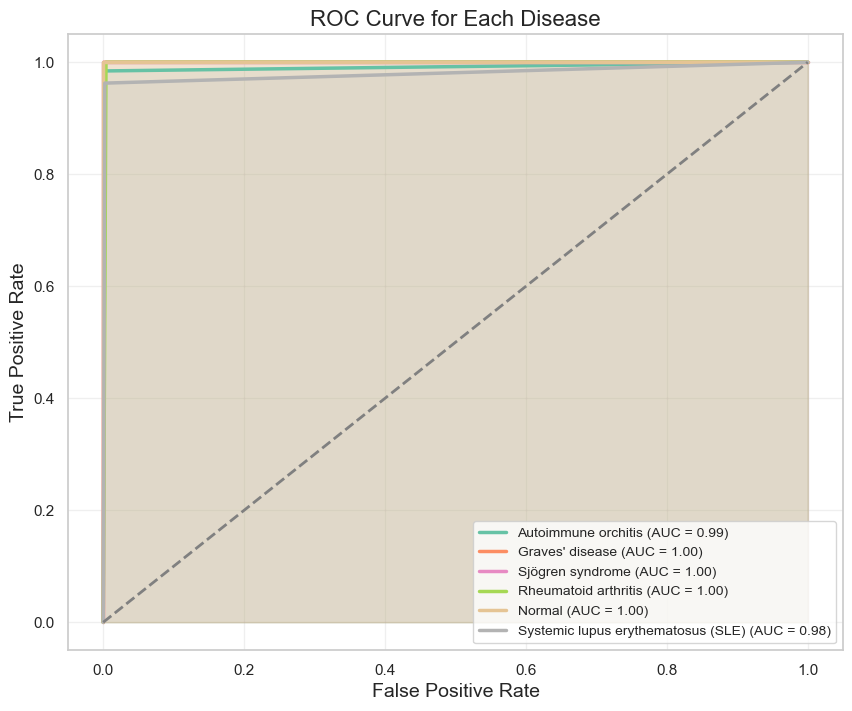

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from matplotlib import cm

plt.figure(figsize=(10, 8))

# Choose a colormap for multiple curves
colors = cm.Set2(np.linspace(0, 1, len(label_mapping)))

# Loop through each label to calculate and plot the ROC curve
for i, (label, color) in enumerate(zip(label_mapping.values(), colors)):
    fpr, tpr, _ = roc_curve(all_labels[:, i], all_preds[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2.5, label=f'{label} (AUC = {roc_auc:.2f})')
    # Optional: fill under curve lightly
    plt.fill_between(fpr, tpr, alpha=0.1, color=color)

# Baseline
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Labels and title
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve for Each Disease', fontsize=16)

# Grid and legend
plt.grid(alpha=0.3)
plt.legend(loc='lower right', fontsize=10)

plt.show()
